## NA

#### Категориальные признаки

In [ ]:
# Заполнить пропуски самым популярным классом

popular_category = data['категория'].value_counts().index[0]
data['категория'] = data['категория'].fillna(popular_category)

In [ ]:
# Заполнить пропуски новой категорией

data['категория'] = data['категория'].fillna('Неизвестная категория')

#### Вещественные признаки

In [ ]:
# константа, среднее, медиана

data['сумма'].fillna(data['сумма'.mean])

In [ ]:
# заполнять пропуски, смотря на похожие объекты

grouped_means = data.groupby('категория')['сумма'].transform("mean")
data['сумма'] = data['сумма'].fillna(grouped_means)

In [1]:
# предыдущее / следующее значение
data['сумма'].fillna(method='ffill')
data['сумма'].fillna(method='bfill')

NameError: name 'data' is not defined

## Выбросы

In [ ]:
# боксплот или гистограмма

plt.boxplot(data)
plt.hist(data, bins=20)


In [ ]:
### Расчитаем длину усиков
q_low = data['сумма'].quantile(0.25)
q_high = data['сумма'].quantile(0.75)

tentacle_length = q_high - q_low

upper_tentacle = q_high + 1.5 * tentacle_length

data[data['сумма']<upper_tentacle]

# 1,5 - можно менять

## Advanced-счетчики

счетчики

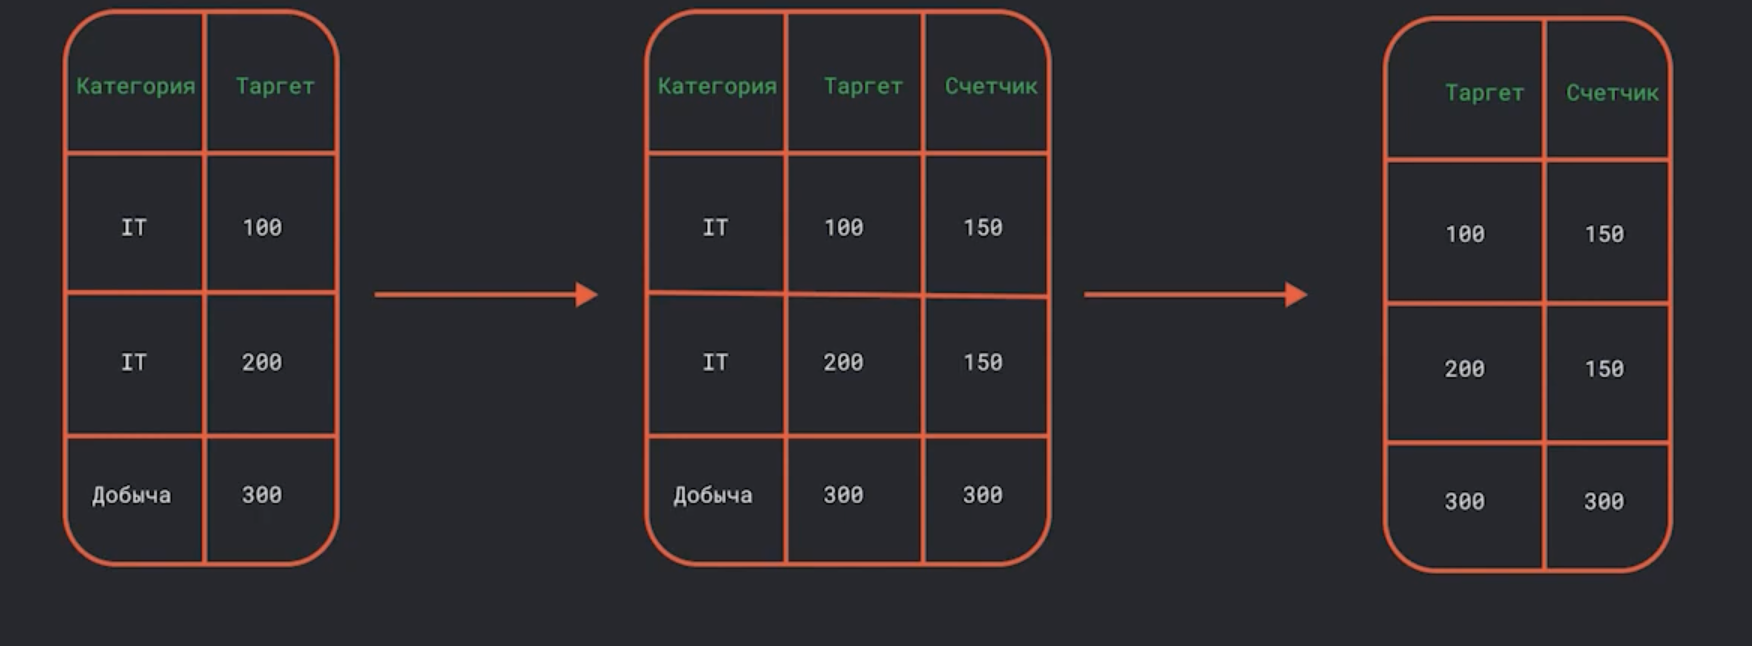

Добавить шум
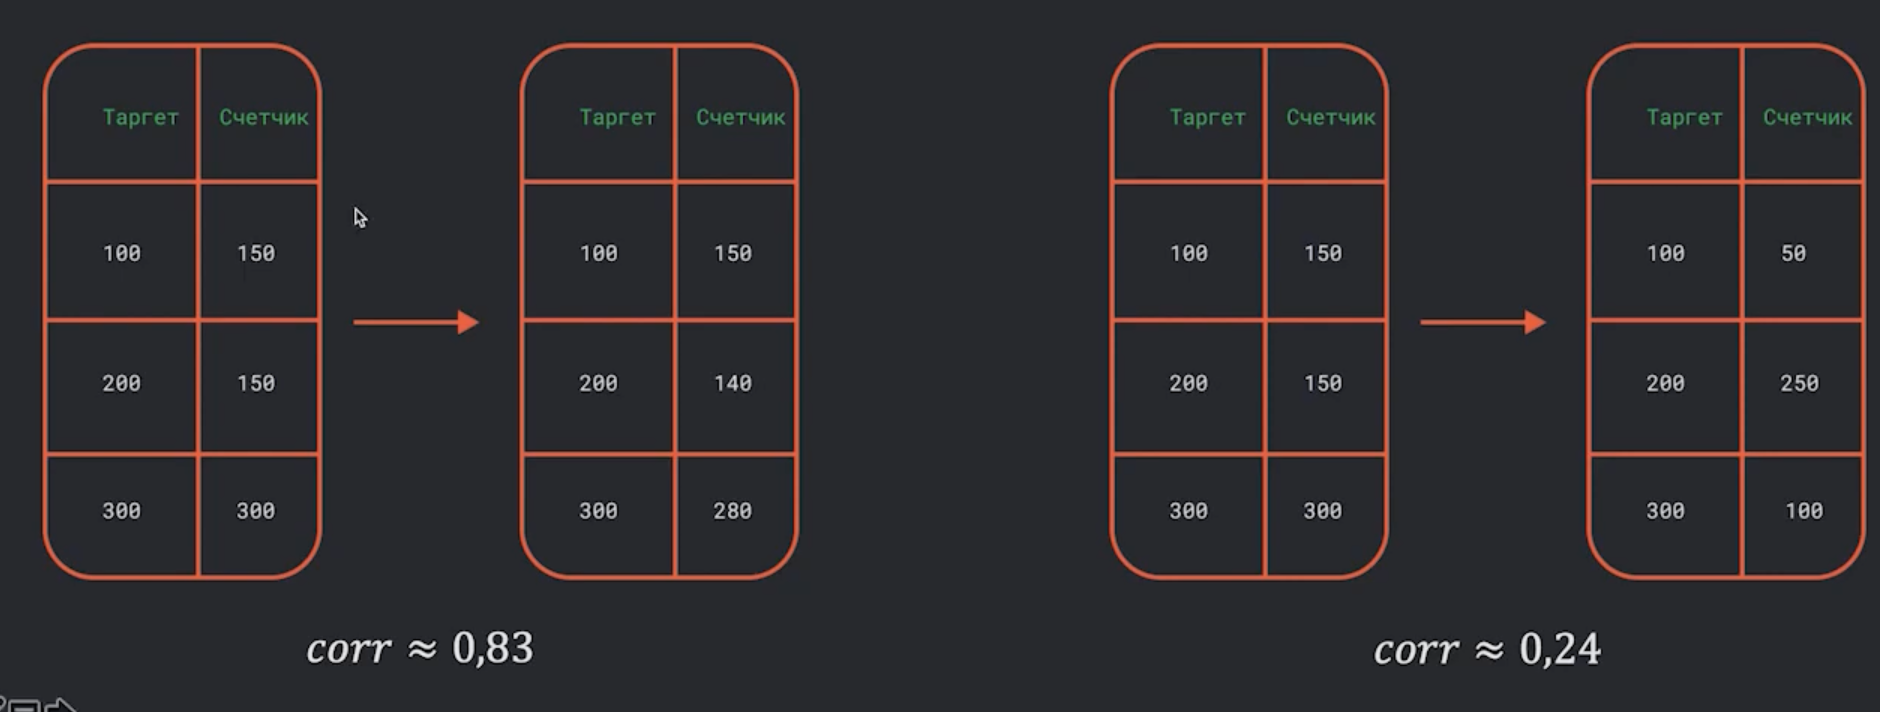

кросс-валидация

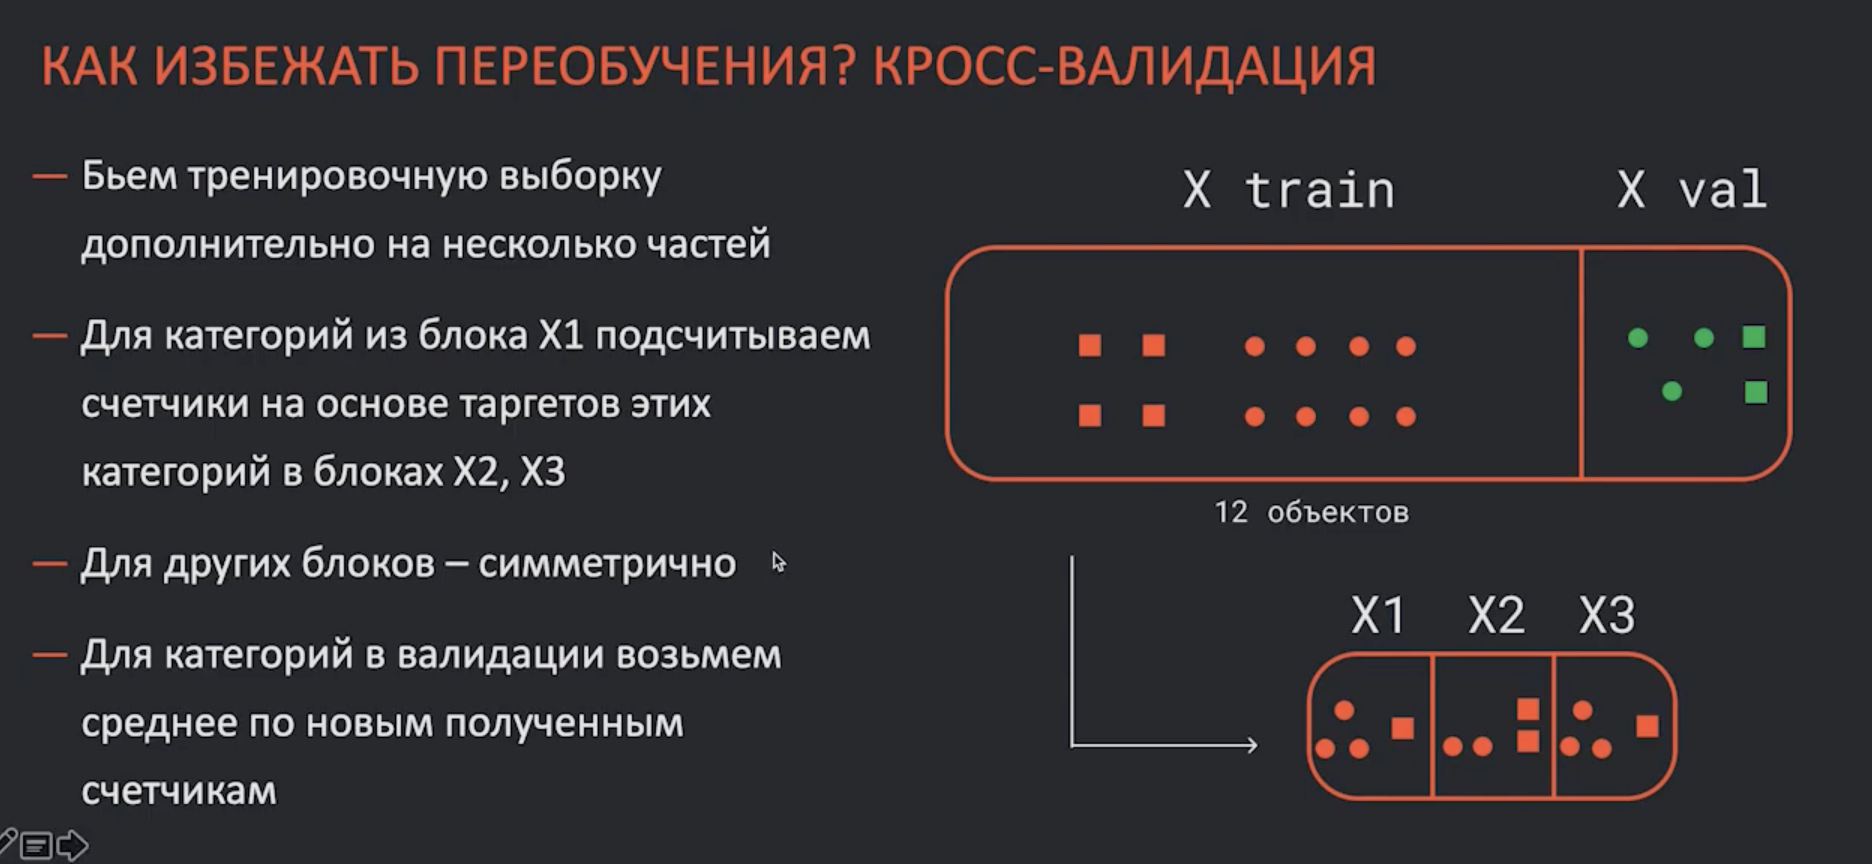


## Признаки из текста TF-IDF

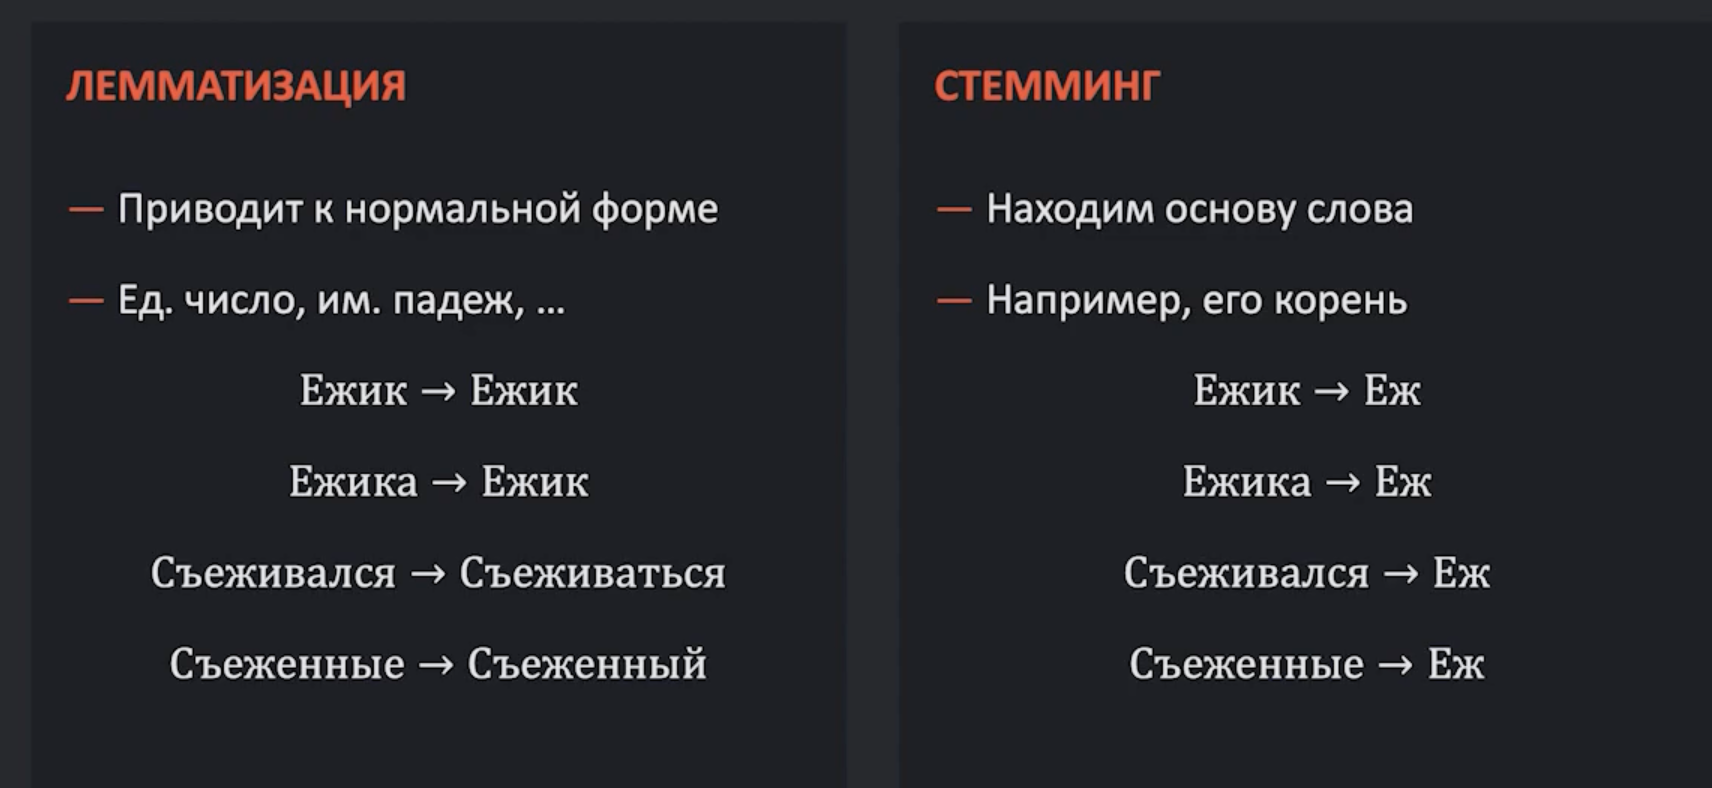

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
tfidf.fit(data['описание'])

In [ ]:
first_document = data['описание'][0]
tfidf.transform([first_document])
tfidf.transform([first_document]).todense()

In [ ]:
tfidf.get_feature_names()

## Преобразование категориальных признаков

In [ ]:
# разделить колонки по типам данных
numerical_df = df.select_dtypes(include=['number'])  # Числовые колонки
categorical_df = df.select_dtypes(exclude=['number'])  # Все нечисловые (категориальные, строковые, даты и т.д.)


In [ ]:
# OneHotEncoding
df = pd.get_dummies(df, columns=['Style'], dtype=int, drop_first=True) 

In [ ]:
# Mean Label Encoding 
df['Country'] = df['Country'].map(df.groupby('Country')['Stars'].mean())